In [619]:
# Import required libraries and dependencies
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pydotplus
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sleep_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_df.fillna('None',inplace=True)

In [3]:
sleep_df['BMI Category'] = [category if category != 'Normal Weight' else 'Normal' for category in sleep_df['BMI Category']]
sleep_df['Systolic Pressure'] = [int(string[:3]) for string in sleep_df['Blood Pressure']]
sleep_df['Diastolic Pressure'] = [int(string[-2:]) for string in sleep_df['Blood Pressure']]
disorder = sleep_df['Sleep Disorder']
sleep_df.drop(columns=['Blood Pressure','Sleep Disorder','Occupation','Person ID'],inplace=True)

In [252]:
X_train_final = X_train
X_test_final = X_test
y_train_final = y_train
y_test_final = y_test

In [474]:
y = disorder.values
X = pd.get_dummies(sleep_df)
#y = np.concatenate([y,y,y,y,y,y,y,y,y,y])
#X = X._append(X)._append(X)._append(X)._append(X)._append(X)._append(X)._append(X)._append(X)._append(X)
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

In [475]:
pd.DataFrame(y_train).value_counts()

None           164
Insomnia        58
Sleep Apnea     58
Name: count, dtype: int64

In [476]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [477]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train, y_train)


In [478]:
# Making predictions using the testing data
predictions = model.predict(X_test)

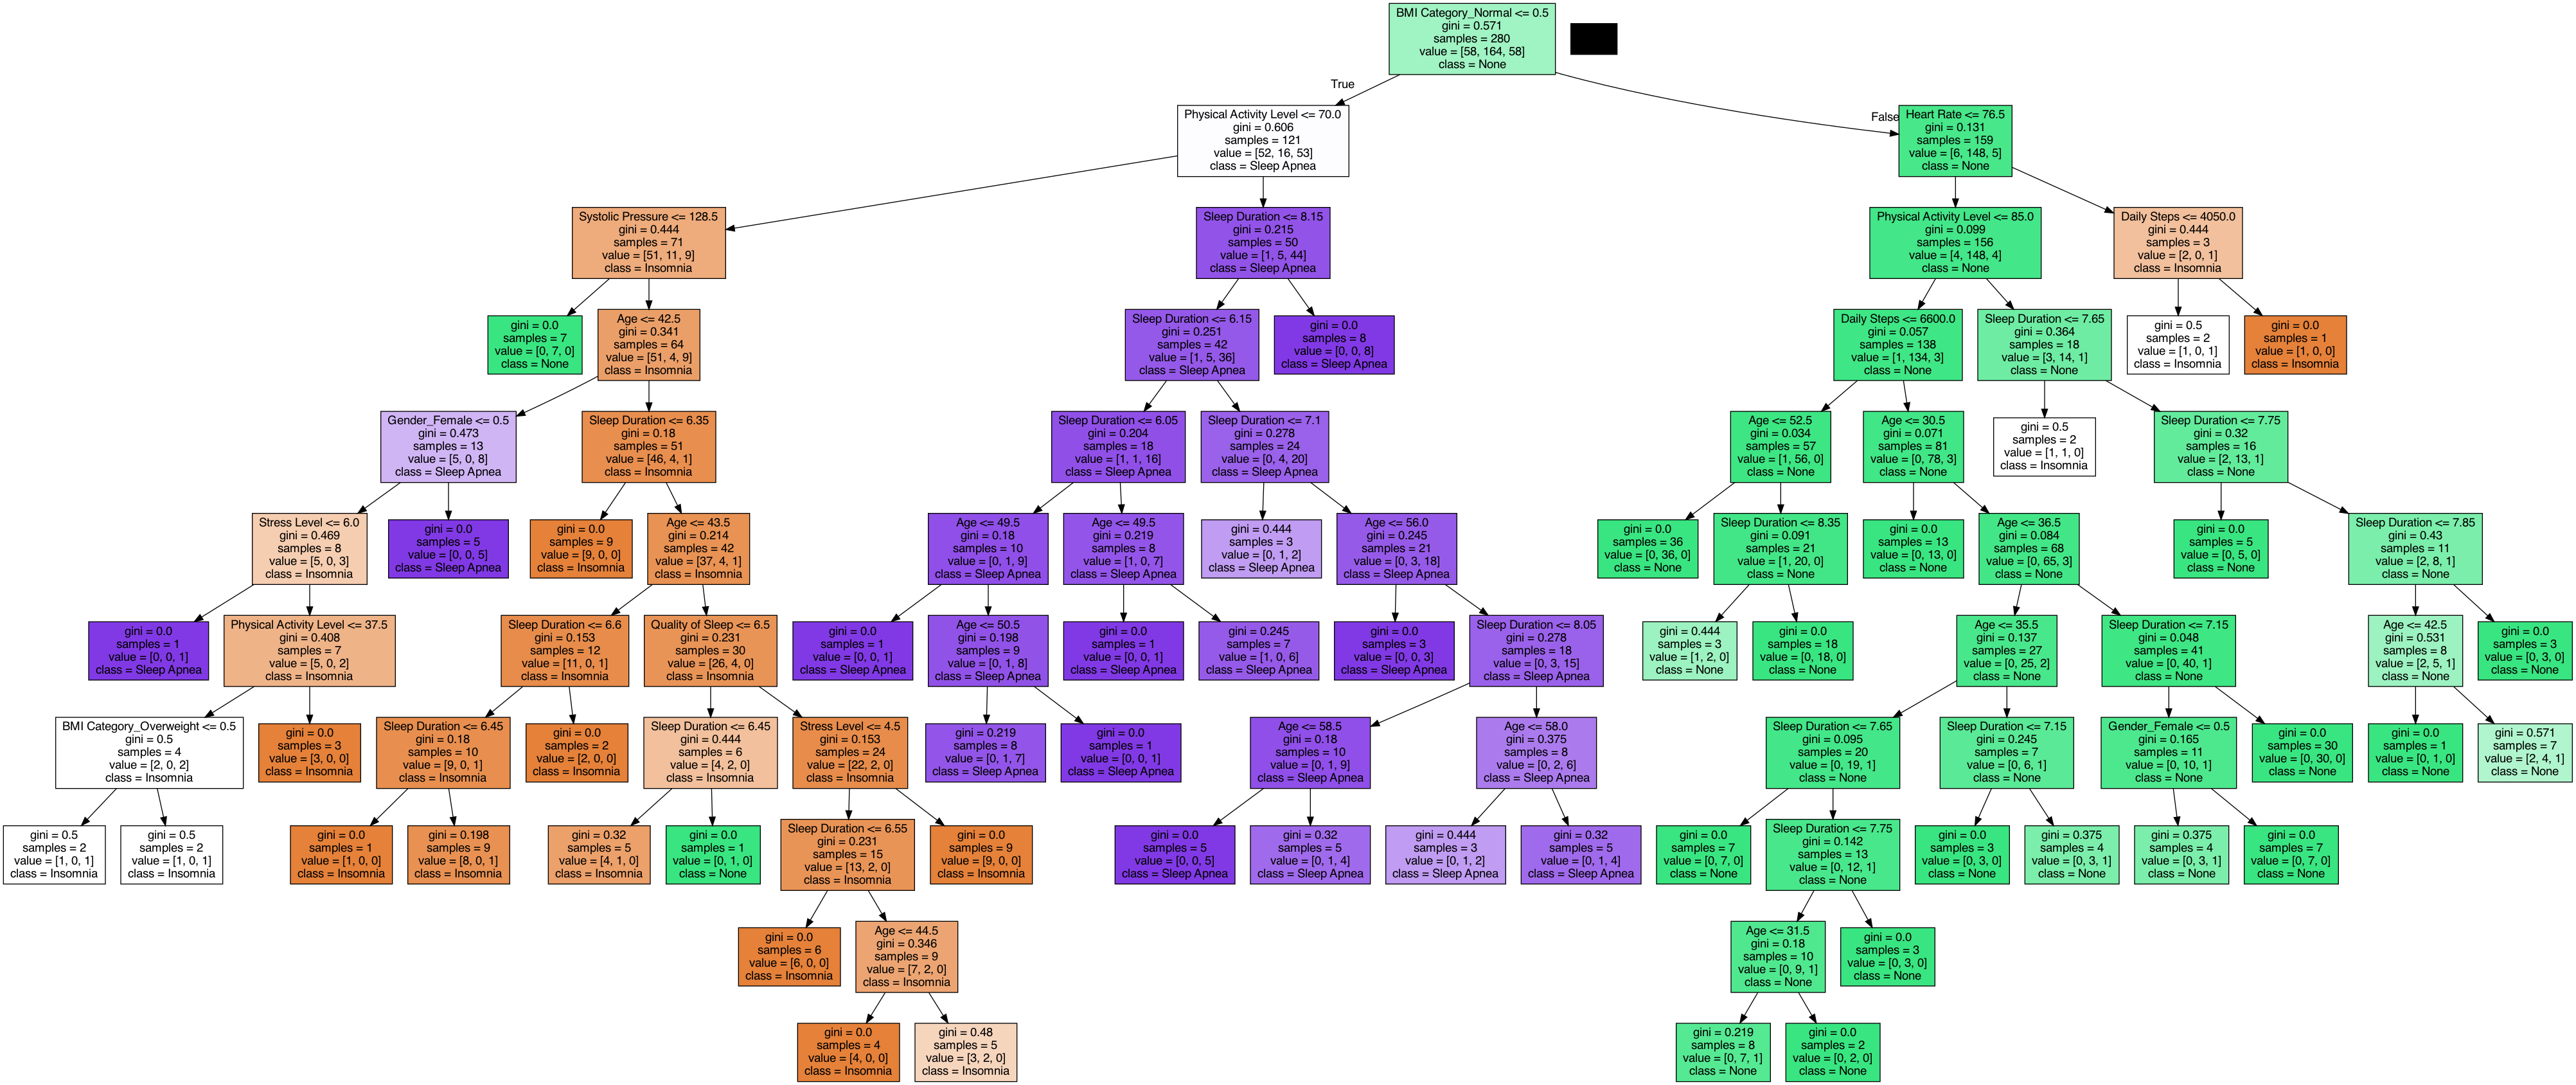

In [505]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["Insomnia", "None","Sleep Apnea"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png(f'decision_tree{i}.png')

# Show graph
Image(graph.create_png())

In [480]:
confusion_matrix(y_test, predictions)

array([[16,  3,  0],
       [ 2, 52,  1],
       [ 2,  1, 17]])

In [481]:
accuracy_score(y_test,predictions)

0.9042553191489362

In [491]:
report = classification_report(y_test,predictions,output_dict=True)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Insomnia       0.80      0.84      0.82        19
        None       0.93      0.95      0.94        55
 Sleep Apnea       0.94      0.85      0.89        20

    accuracy                           0.90        94
   macro avg       0.89      0.88      0.88        94
weighted avg       0.91      0.90      0.90        94



In [506]:
report

{'Insomnia': {'precision': 0.8,
  'recall': 0.8421052631578947,
  'f1-score': 0.8205128205128205,
  'support': 19.0},
 'None': {'precision': 0.9285714285714286,
  'recall': 0.9454545454545454,
  'f1-score': 0.9369369369369368,
  'support': 55.0},
 'Sleep Apnea': {'precision': 0.9444444444444444,
  'recall': 0.85,
  'f1-score': 0.8947368421052632,
  'support': 20.0},
 'accuracy': 0.9042553191489362,
 'macro avg': {'precision': 0.8910052910052911,
  'recall': 0.8791866028708134,
  'f1-score': 0.8840621998516736,
  'support': 94.0},
 'weighted avg': {'precision': 0.9059608240459304,
  'recall': 0.9042553191489362,
  'f1-score': 0.9044256591848977,
  'support': 94.0}}

In [608]:
accuracy = list()
insomnia_recall = list()
none_recall = list()
sleep_apnea_recall = list()
insomnia_precision = list()
none_precision = list()
sleep_apnea_precision = list()
cms = list()

for i in range(10):
    y = disorder.values
    X = pd.get_dummies(sleep_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=i)

    # Creating the decision tree classifier instance
    model = tree.DecisionTreeClassifier()
    # Fitting the model
    model = model.fit(X_train, y_train)

    # Making predictions using the testing data
    predictions = model.predict(X_test)

    # Create DOT data
    dot_data = tree.export_graphviz(
        model, out_file=None, feature_names=X.columns, class_names=["Insomnia", "None","Sleep Apnea"], filled=True)
    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)
    # Write png
    graph.write_png(f'decision_tree{i}.png')
    
    cms.append(confusion_matrix(y_test, predictions))
    report = classification_report(y_test,predictions,output_dict=True)
    accuracy.append(report['accuracy'])
    insomnia_recall.append(report['Insomnia']['recall'])
    none_recall.append(report['None']['recall'])
    sleep_apnea_recall.append(report['Sleep Apnea']['recall'])
    insomnia_precision.append(report['Insomnia']['precision'])
    none_precision.append(report['None']['precision'])
    sleep_apnea_precision.append(report['Sleep Apnea']['precision'])





In [609]:
report_df = pd.DataFrame({'accuracy':accuracy, 'insomnia_recall':insomnia_recall,'none_recall':none_recall,'sleep_apnea_recall':sleep_apnea_recall,'insomnia_precision':insomnia_precision,'none_precision':none_precision,'sleep_apnea_precision':sleep_apnea_precision})
#report_df = report_df._append(dict(report_df.mean()),ignore_index=True)
report_df

,accuracy,insomnia_recall,none_recall,sleep_apnea_recall,insomnia_precision,none_precision,sleep_apnea_precision
0,0.893617,0.826087,0.940000,0.857143,0.826087,0.921569,0.900000
1,0.882979,0.789474,0.962264,0.772727,0.833333,0.894737,0.894737
2,0.904255,0.842105,0.945455,0.850000,0.800000,0.928571,0.944444
3,0.893617,0.789474,0.948276,0.823529,0.833333,0.948276,0.777778
4,0.925532,0.789474,0.966667,0.933333,0.882353,0.983051,0.777778
5,0.882979,0.866667,0.913793,0.809524,0.722222,0.963636,0.809524
6,0.872340,0.888889,0.913793,0.722222,0.695652,0.929825,0.928571
7,0.904255,0.863636,0.979167,0.791667,0.904762,0.903846,0.904762
8,0.914894,0.882353,0.966667,0.764706,0.833333,0.935484,0.928571
9,0.904255,0.789474,0.961538,0.869565,0.937500,0.925926,0.833333


In [667]:
report_df.loc[:,['insomnia_recall','sleep_apnea_recall','insomnia_precision','sleep_apnea_precision']]

,insomnia_recall,sleep_apnea_recall,insomnia_precision,sleep_apnea_precision
0,0.826087,0.857143,0.826087,0.900000
1,0.789474,0.772727,0.833333,0.894737
2,0.842105,0.850000,0.800000,0.944444
3,0.789474,0.823529,0.833333,0.777778
4,0.789474,0.933333,0.882353,0.777778
5,0.866667,0.809524,0.722222,0.809524
6,0.888889,0.722222,0.695652,0.928571
7,0.863636,0.791667,0.904762,0.904762
8,0.882353,0.764706,0.833333,0.928571
9,0.789474,0.869565,0.937500,0.833333


In [672]:
report_df.loc[:,['insomnia_recall','sleep_apnea_recall','insomnia_precision','sleep_apnea_precision']].sum(1)

0    3.409317
1    3.290271
2    3.436550
3    3.224114
4    3.382938
5    3.207937
6    3.235335
7    3.464827
8    3.408964
9    3.429872
dtype: float64

In [669]:
report_df.loc[:,['insomnia_recall','sleep_apnea_recall']].sum(1)

0    1.683230
1    1.562201
2    1.692105
3    1.613003
4    1.722807
5    1.676190
6    1.611111
7    1.655303
8    1.647059
9    1.659039
dtype: float64

In [671]:
report_df.loc[:,['insomnia_recall','sleep_apnea_recall']].min(1)

0    0.826087
1    0.772727
2    0.842105
3    0.789474
4    0.789474
5    0.809524
6    0.722222
7    0.791667
8    0.764706
9    0.789474
dtype: float64

In [653]:
means = report_df.mean()
means

accuracy                 0.897872
insomnia_recall          0.832763
none_recall              0.949762
sleep_apnea_recall       0.819442
insomnia_precision       0.826858
none_precision           0.933492
sleep_apnea_precision    0.869950
dtype: float64

In [612]:
sse = []
for i in range(10):
    sse.append(sum((report_df.loc[i,] - means)**2))
sse

[0.002625126491878447,
 0.00659263542203987,
 0.007375367265692729,
 0.010667197825733497,
 0.02992761531590929,
 0.01827194151665398,
 0.035212156234473345,
 0.010789819514782861,
 0.009513033429242911,
 0.0182055337413361]

In [613]:
cm_total = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(10):
    cm_total = cm_total + cms[i]
cm_avg = cm_total / 10
cm_avg

array([[15.8,  1.7,  1.5],
       [ 1.8, 52.4,  1. ],
       [ 1.6,  2. , 16.2]])

In [658]:
cms[0]

array([[19,  2,  2],
       [ 3, 47,  0],
       [ 1,  2, 18]])

In [614]:
cm_sse = []
for i in range(10):
    cm_sse.append(sum(sum((cm_avg - cms[i])**2)))
cm_sse

[45.77999999999998,
 8.979999999999997,
 5.9799999999999995,
 15.380000000000006,
 44.58000000000001,
 14.580000000000007,
 19.779999999999998,
 51.97999999999998,
 45.38000000000001,
 25.78]

In [ ]:
#This approach in other models
pd.DataFrame(y[(sleep_df['Systolic Pressure'] <= 137) & (sleep_df['BMI Category'] != 'Normal')]).value_counts().plot.bar()

Text(0.5, 1.0, 'Normal BMI')

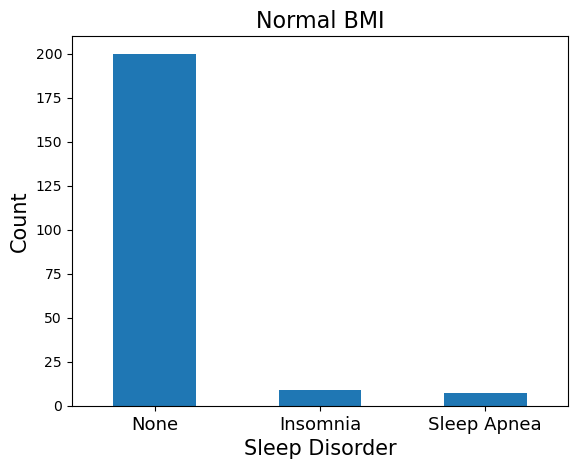

In [750]:
normal_bmi = pd.DataFrame(y[sleep_df['BMI Category'] == 'Normal']).value_counts().plot.bar()
normal_bmi.set_xlabel('Sleep Disorder',fontsize=15)
normal_bmi.set_ylabel('Count',fontsize=15)
normal_bmi.set_xticklabels(['None','Insomnia','Sleep Apnea'],fontsize=13,rotation=0)
normal_bmi.set_title('Normal BMI',fontsize=16)

<Axes: xlabel='0'>

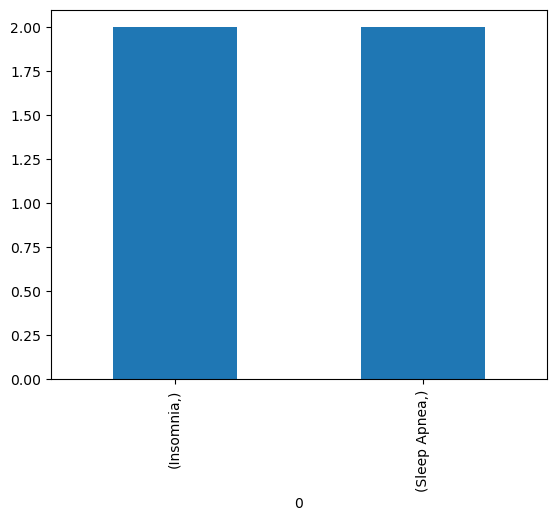

In [697]:
pd.DataFrame(y[(sleep_df['Diastolic Pressure'] > 85.5) & (sleep_df['BMI Category'] == 'Normal')]).value_counts().plot.bar()

Text(0.5, 1.0, 'Overweight BMI')

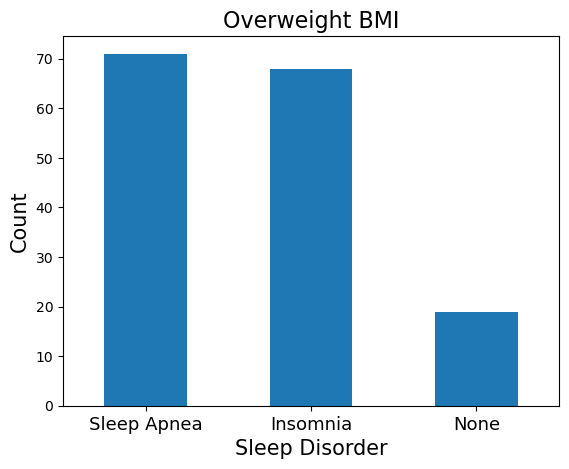

In [758]:
overweight = pd.DataFrame(y[sleep_df['BMI Category'] != 'Normal']).value_counts().plot.bar()
overweight.set_xlabel('Sleep Disorder',fontsize=15)
overweight.set_ylabel('Count',fontsize=15)
overweight.set_xticklabels(['Sleep Apnea','Insomnia','None'],fontsize=13,rotation=0)
overweight.set_title('Overweight BMI',fontsize=16)

Text(0.5, 1.0, 'Overweight & Active')

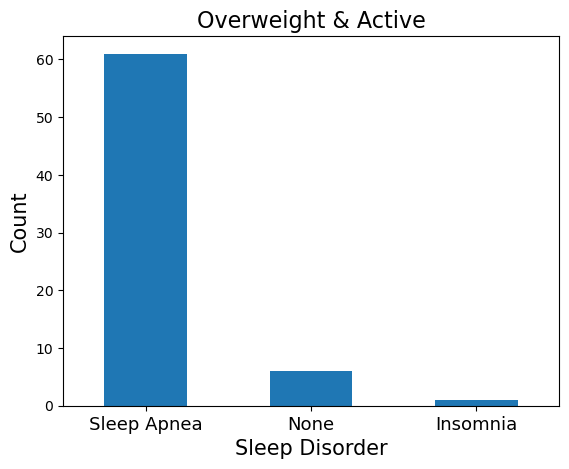

In [754]:
#Determine sleep apnea
ow_active = pd.DataFrame(y[(sleep_df['Physical Activity Level'] > 70) & (sleep_df['BMI Category'] != 'Normal')]).value_counts().plot.bar()
ow_active.set_xlabel('Sleep Disorder',fontsize=15)
ow_active.set_ylabel('Count',fontsize=15)
ow_active.set_xticklabels(['Sleep Apnea','None','Insomnia'],fontsize=13,rotation=0)
ow_active.set_title('Overweight & Active',fontsize=16)

Text(0.5, 1.0, 'Overweight & Inactive')

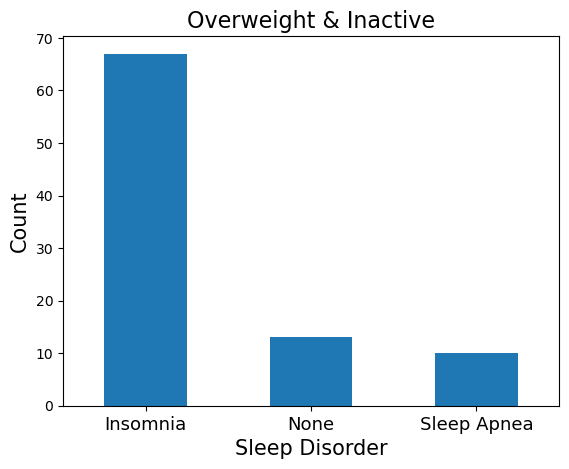

In [757]:
#Determine insomnia
ow_inactive = pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal')]).value_counts().plot.bar()
ow_inactive.set_xlabel('Sleep Disorder',fontsize=15)
ow_inactive.set_ylabel('Count',fontsize=15)
ow_inactive.set_xticklabels(['Insomnia','None','Sleep Apnea'],fontsize=13,rotation=0)
ow_inactive.set_title('Overweight & Inactive',fontsize=16)

Text(0.5, 1.0, 'Overweight, Inactive, & Normal SP')

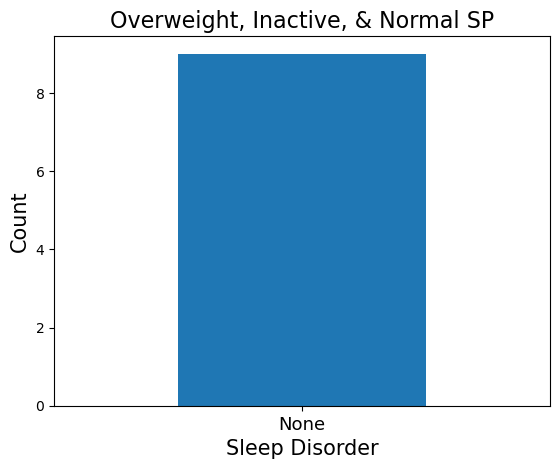

In [759]:
#None separated from above plot
ow_inactive_normal_bp = pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal') & (sleep_df['Systolic Pressure'] <= 128.5)]).value_counts().plot.bar()
ow_inactive_normal_bp.set_xlabel('Sleep Disorder',fontsize=15)
ow_inactive_normal_bp.set_ylabel('Count',fontsize=15)
ow_inactive_normal_bp.set_xticklabels(['None'],fontsize=13,rotation=0)
ow_inactive_normal_bp.set_title('Overweight, Inactive, & Normal SP',fontsize=16)

<Axes: xlabel='0'>

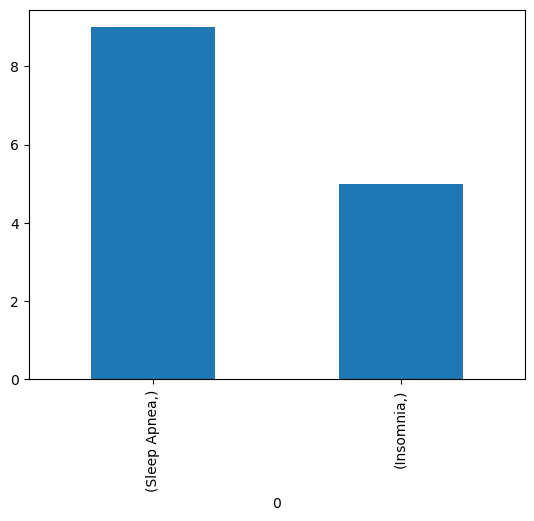

In [681]:
#cutoff of 42.5 only works because of most insomnia lying right above 42.5. We expect there to be a much smaller number of women here. Could be conincidence that they have sleep apnea
pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal') & (sleep_df['Systolic Pressure'] > 128.5) & (sleep_df['Age'] <= 42.5)]).value_counts().plot.bar()

<Axes: xlabel='0'>

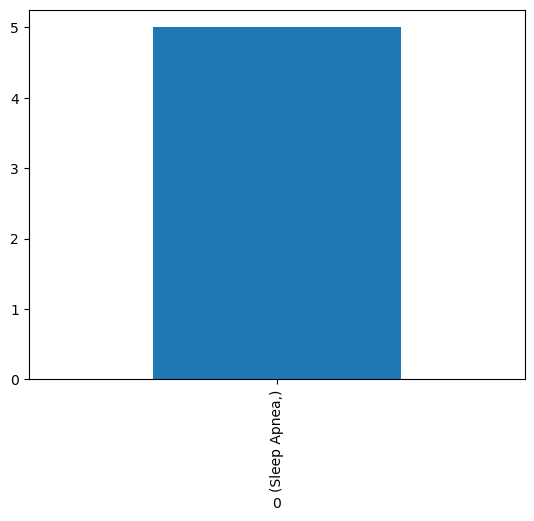

In [685]:
pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal') & (sleep_df['Systolic Pressure'] > 128.5) & (sleep_df['Age'] <= 42.5) & (sleep_df['Gender'] == 'Female')]).value_counts().plot.bar()

<Axes: ylabel='Frequency'>

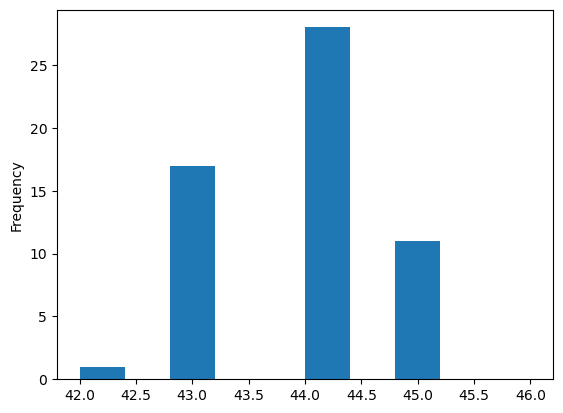

In [710]:
sleep_df.loc[y == 'Insomnia','Age'].plot.hist(range=[42,46])

<Axes: ylabel='Frequency'>

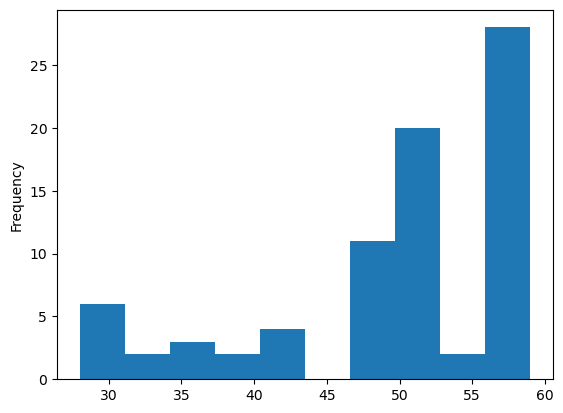

In [695]:
sleep_df.loc[y == 'Sleep Apnea','Age'].plot.hist()

<Axes: ylabel='Frequency'>

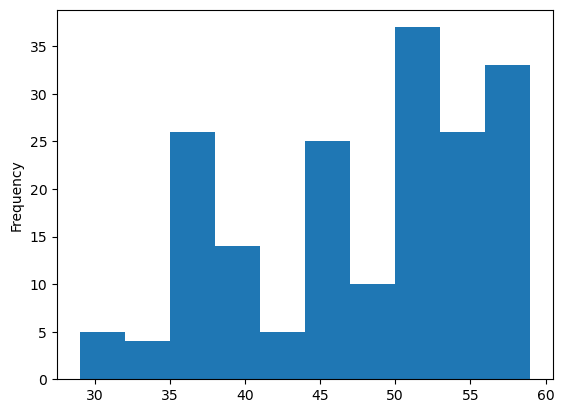

In [707]:
sleep_df.loc[sleep_df['Gender'] == 'Female','Age'].plot.hist()

<Axes: ylabel='Frequency'>

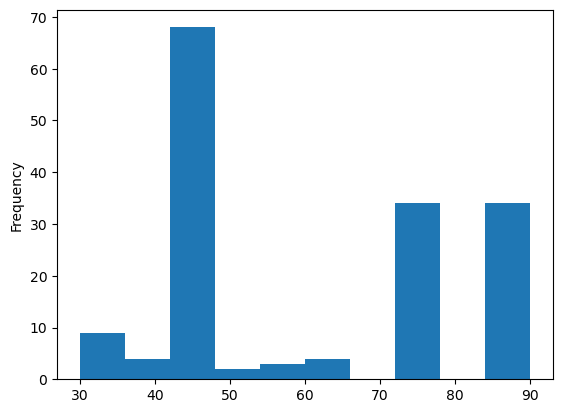

In [715]:
sleep_df.loc[sleep_df['BMI Category'] != 'Normal','Physical Activity Level'].plot.hist()

<Axes: ylabel='Frequency'>

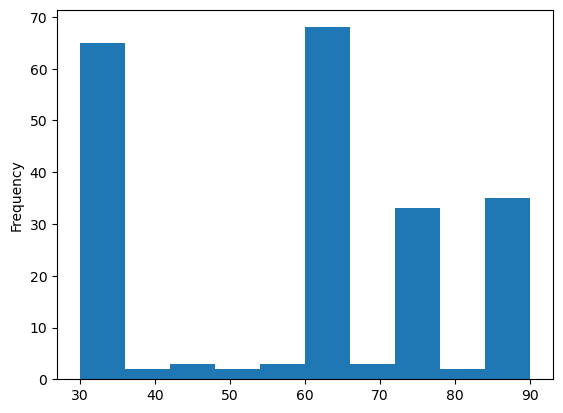

In [716]:
sleep_df.loc[sleep_df['BMI Category'] == 'Normal','Physical Activity Level'].plot.hist()

In [706]:
sleep_df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [379]:
confusion_matrix(y_test, predictions)

array([[105,   9,   9],
       [  5, 389,   7],
       [  3,   8, 120]])

In [266]:
# Making predictions using the testing data
predictions = model.predict(X_test_final)
confusion_matrix(y_test_final, predictions)

array([[17,  1,  0],
       [ 1, 51,  1],
       [ 2,  1, 20]])

In [245]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000)#,max_depth=3)#,max_samples=100)#,bootstrap=False)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [246]:
confusion_matrix(y_test, predictions)


array([[17,  1,  0],
       [ 1, 51,  1],
       [ 2,  1, 20]])

In [247]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1487591879463577, 'Diastolic Pressure'),
 (0.14614803886034422, 'Systolic Pressure'),
 (0.14541553970469856, 'BMI Category_Normal'),
 (0.1141592271588242, 'Age'),
 (0.11065353205452581, 'Sleep Duration'),
 (0.0804625247314384, 'BMI Category_Overweight'),
 (0.06521466175303957, 'Physical Activity Level'),
 (0.05192395365451735, 'Daily Steps'),
 (0.04794551046758253, 'Heart Rate'),
 (0.03418253066127404, 'Stress Level'),
 (0.030900378705901607, 'Quality of Sleep'),
 (0.010405339934808069, 'Gender_Female'),
 (0.009767396460257545, 'Gender_Male'),
 (0.00406217790643043, 'BMI Category_Obese')]

In [82]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['None', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None',
       'Insomnia', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None',
       'None', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None',
       'None', 'None', 'Insomnia', 'None', 'None', 'Sleep Apnea',
       'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'None',
       'Insomnia', 'Sleep Apnea', 'None', 'Sleep Apnea', 'None',
       'Sleep Apnea', 'None', 'None', 'None', 'Sleep Apnea', 'None',
       'Sleep Apnea', 'None', 'None', 'Sleep Apnea', 'None', 'None',
       'None', 'Sleep Apnea', 'None', 'Insomnia', 'None', 'None',
       'Insomnia', 'None', 'Insomnia', 'None', 'None', 'None', 'None',
       'Sleep Apnea', '

In [83]:
confusion_matrix(y_test,y_pred)

array([[11,  7,  1],
       [ 0, 52,  2],
       [ 1,  5, 15]])